In [1]:
import pandas as pd
import numpy as np

iris = pd.read_csv('../datasets/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,5.0,3.0,1.6,0.2,Iris-setosa
4,5,5.0,3.5,1.3,0.3,Iris-setosa


In [2]:
from sklearn.model_selection import train_test_split

X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
# Ensemble in ML is a technique that combines several base models in order to produce one optimal predictive model.
# here, using random forest classifier which is an ensemble model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100) # n_estimators is the number of trees in the forest

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [4]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9166666666666666


In [5]:
clf.predict([[3, 5, 4, 0.3]])

/Users/semihozturk/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [6]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [7]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False
            )

RandomForestClassifier(max_features='auto', n_jobs=1)

In [8]:
# Feature Importance in Random Forest

feature_names={'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'}
feature_imp = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

SepalLengthCm    0.473908
PetalLengthCm    0.374563
PetalWidthCm     0.120110
SepalWidthCm     0.031419
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


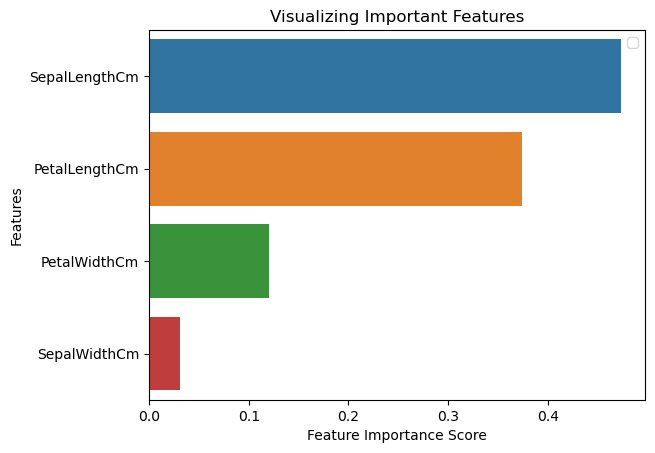

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [10]:
# now using AdaBoost Classifier which is another ensemble model 
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
# Changing base learner
from sklearn.svm import SVC

svc = SVC(probability=True, kernel='linear')

abc = AdaBoostClassifier(n_estimators=50, estimator=svc, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [12]:
# Random oversampling-undersampling imbalanced datasets
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

data=pd.read_csv('../datasets/stroke.csv')

data.head()
data['stroke'] = data['stroke'].astype('int')
data['stroke'].value_counts()   

stroke
0    42617
1      783
Name: count, dtype: int64

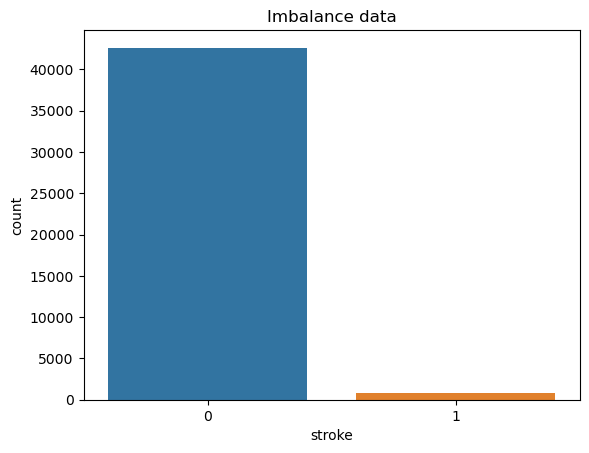

In [13]:
sns.countplot(x='stroke', data=data)
plt.title("Imbalance data")
plt.show()

In [14]:
data = pd.get_dummies(data,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
data.head(4)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,False
1,30468,58.0,1,0,87.96,39.2,0,False,True,False,...,False,False,True,False,False,False,True,False,True,False
2,16523,8.0,0,0,110.89,17.6,0,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3,56543,70.0,0,0,69.04,35.9,0,True,False,False,...,False,False,True,False,False,True,False,True,False,False


In [15]:
data=data.dropna(axis=0)

In [16]:
X = data.drop('stroke',axis=1)
y = data['stroke']

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [knn, nb, dt, rf]

for model in models:
    print("MODEL NAME: ", model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

MODEL NAME:  KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12401
           1       0.00      0.00      0.00       181

    accuracy                           0.99     12582
   macro avg       0.49      0.50      0.50     12582
weighted avg       0.97      0.99      0.98     12582

MODEL NAME:  GaussianNB()
              precision    recall  f1-score   support

           0       1.00      0.15      0.26     12401
           1       0.02      0.99      0.03       181

    accuracy                           0.16     12582
   macro avg       0.51      0.57      0.15     12582
weighted avg       0.99      0.16      0.26     12582

MODEL NAME:  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12401
           1       0.04      0.04      0.04       181

    accuracy                           0.97     12582
   macro avg       0.51     

/Users/semihozturk/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/semihozturk/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/semihozturk/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [19]:
# Oversampling
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=1)
X_os, y_os = os.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,test_size=0.3,random_state=1)

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     12451
           1       0.89      1.00      0.94     12326

    accuracy                           0.94     24777
   macro avg       0.94      0.94      0.94     24777
weighted avg       0.94      0.94      0.94     24777

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

           0       0.99      0.26      0.42     12451
           1       0.57      1.00      0.73     12326

    accuracy                           0.63     24777
   macro avg       0.78      0.63      0.57     24777
weighted avg       0.78      0.63      0.57     24777

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     12451
           1       0.96      0.97      0.97     12326

    accuracy                           0.97     24777
   macro avg       0.97      0.

In [20]:
from imblearn.under_sampling import RandomUnderSampler

us= RandomUnderSampler(random_state=1)
X_us, y_us = us.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_us,y_us,test_size=0.3,random_state=1)

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))

MODEL NAME: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       193
           1       0.73      0.70      0.72       193

    accuracy                           0.72       386
   macro avg       0.72      0.72      0.72       386
weighted avg       0.72      0.72      0.72       386

MODEL NAME: GaussianNB()
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       193
           1       0.58      1.00      0.74       193

    accuracy                           0.64       386
   macro avg       0.79      0.64      0.59       386
weighted avg       0.79      0.64      0.59       386

MODEL NAME: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.63      0.66      0.65       193
           1       0.65      0.62      0.63       193

    accuracy                           0.64       386
   macro avg       0.64      0.

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
# Define the number of folds (K)
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())

Cross-validation results: [0.98497854 0.98581307 0.98319027 0.98378443 0.98557291]
Mean accuracy: 0.9846678435226213


In [22]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
# Define an asymmetric loss function
def asymmetric_loss(y_true, y_pred):
    # Assuming y_true and y_pred are binary labels
    # Define different misclassification costs for each class
    cost_false_positive = 1  # Cost of misclassifying class 0 as class 1
    cost_false_negative = 5  # Cost of misclassifying class 1 as class 0

    # Calculate the asymmetric loss
    loss = np.sum((y_true == 0) & (y_pred == 1)) * cost_false_positive + \
           np.sum((y_true == 1) & (y_pred == 0)) * cost_false_negative

    return loss

# Make a scorer from the asymmetric loss function
custom_scorer = make_scorer(asymmetric_loss, greater_is_better=False)

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Use cross_val_score with the custom scorer
cross_val_results = -cross_val_score(model, X_train, y_train, cv=5, scoring=custom_scorer)

# Print the cross-validation results
print("Cross-validation results:")
print("Individual fold loss values:", cross_val_results)
print("Mean loss value:", cross_val_results.mean())

# Fit the model on the entire training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the asymmetric loss on the test set
test_loss = asymmetric_loss(y_test, y_pred)
print("\nAsymmetric loss on the test set:", test_loss)

Cross-validation results:
Individual fold loss values: [135 111  87  81  69]
Mean loss value: 96.6

Asymmetric loss on the test set: 221


In [23]:
import shap
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [24]:
X=iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Features
y=iris['Species']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [25]:
shap.initjs()

In [26]:
y_train=pd.Series(y_train).replace({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2})
y_test=pd.Series(y_test).replace({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2})

In [31]:
xgb_model = XGBRegressor(n_estimators=10, max_depth=10, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
y_predict = xgb_model.predict(X_test)

In [29]:
mean_squared_error(y_test, y_predict)**(0.5)

0.5959098582265797

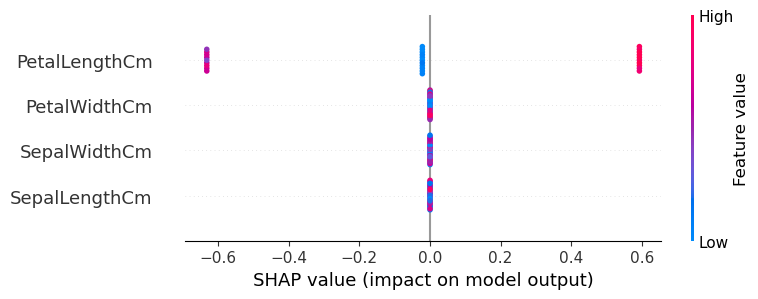

In [30]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)